In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
plt.rcParams['figure.figsize'] = 10,6

In [2]:
data = np.loadtxt("cosmic_data.txt")

In [3]:
data.shape

(20000, 2)

In [5]:
data[:2,:]

array([[1.1943876e+03, 1.1170000e-01],
       [1.2317047e+03, 4.5040000e-01]])

In [6]:
test = 1200

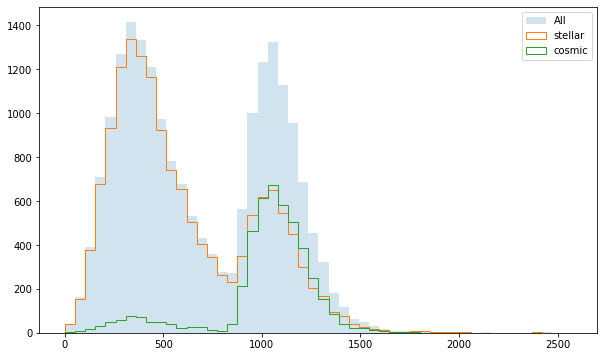

In [34]:
stellar, cosmic =  data[:,0][data[:,1] > 0.5], data[:,0][data[:,1] < 0.5]

_, bins, _ =  plt.hist(data[:,0], alpha=0.2, label='All', bins=50)
# plt.hist(data[:,0], bins=50,  alpha=0.2, label='All')
plt.hist(stellar, bins=bins, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic')
plt.legend();

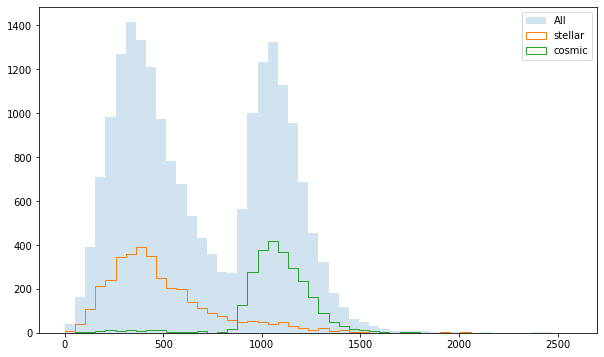

In [35]:
stellar, cosmic =  data[:,0][data[:,1] > 0.9], data[:,0][data[:,1] < 0.1]

_, bins, _ =  plt.hist(data[:,0], alpha=0.2, label='All', bins=50)
# plt.hist(data[:,0], bins=50,  alpha=0.2, label='All')
plt.hist(stellar, bins=bins, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic')
plt.legend();

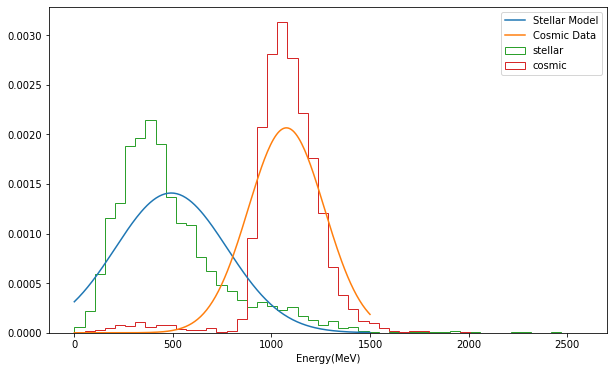

In [36]:
param_s = st.norm.fit(stellar)
param_c = st.norm.fit(cosmic)

xs = np.linspace(0, 1500, 200)
p_s = st.norm.pdf(xs, *param_s)
p_c = st.norm.pdf(xs, *param_c)
plt.plot(xs, p_s, label='Stellar Model')
plt.plot(xs, p_c, label='Cosmic Data')
plt.hist(stellar, bins=bins, density=True, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, density=True, histtype='step', label='cosmic')
plt.legend()
plt.xlabel('Energy(MeV)');

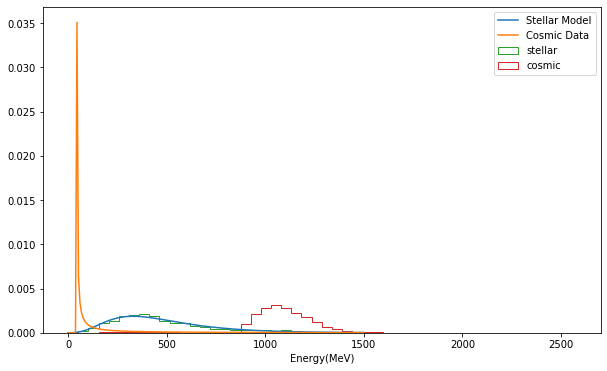

In [37]:
param_s = st.lognorm.fit(stellar)
param_c = st.lognorm.fit(cosmic)

xs = np.linspace(0, 1500, 200)
p_s = st.lognorm.pdf(xs, *param_s)
p_c = st.lognorm.pdf(xs, *param_c)
plt.plot(xs, p_s, label='Stellar Model')
plt.plot(xs, p_c, label='Cosmic Data')
plt.hist(stellar, bins=bins, density=True, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, density=True, histtype='step', label='cosmic')
plt.legend()
plt.xlabel('Energy(MeV)');

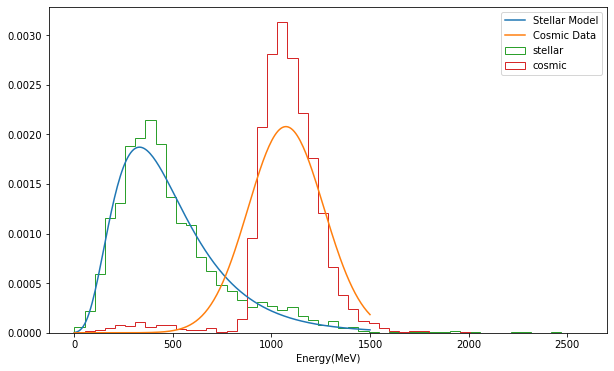

In [38]:
param_s = st.lognorm.fit(stellar, loc=400, scale=100)
param_c = st.lognorm.fit(cosmic, loc=1200, scale=100)

xs = np.linspace(0, 1500, 200)
p_s = st.lognorm.pdf(xs, *param_s)
p_c = st.lognorm.pdf(xs, *param_c)
plt.plot(xs, p_s, label='Stellar Model')
plt.plot(xs, p_c, label='Cosmic Data')
plt.hist(stellar, bins=bins, density=True, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, density=True, histtype='step', label='cosmic')
plt.legend()
plt.xlabel('Energy(MeV)');

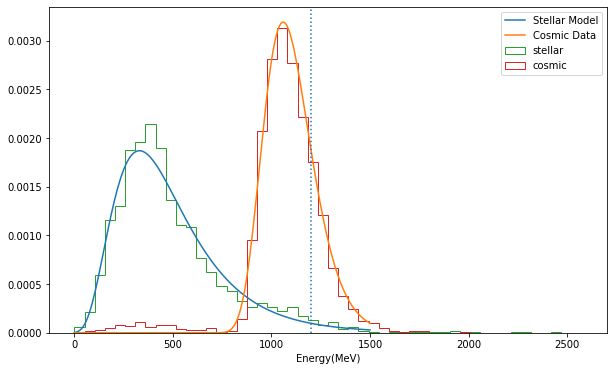

In [42]:
param_s = st.lognorm.fit(stellar, loc=400, scale=100)
cosmic2 = cosmic[cosmic > 700]
param_c = st.lognorm.fit(cosmic2, loc=1200, scale=100)

xs = np.linspace(0, 1500, 200)
p_s = st.lognorm.pdf(xs, *param_s)
p_c = st.lognorm.pdf(xs, *param_c)
plt.plot(xs, p_s, label='Stellar Model')
plt.plot(xs, p_c, label='Cosmic Data')
plt.hist(stellar, bins=bins, density=True, histtype='step', label='stellar')
plt.hist(cosmic, bins=bins, density=True, histtype='step', label='cosmic')
plt.legend()
plt.axvline(test, ls=':', label='Test Particle')
plt.xlabel('Energy(MeV)');

In [45]:
n_stellar, n_cosmic = stellar.shape[0], cosmic.shape[0]

prob_cosmic = st.lognorm.pdf(test, *param_c) * n_cosmic
prob_stellar = st.lognorm.pdf(test, *param_s) * n_stellar

total_prob = prob_cosmic + prob_stellar
final_prob =  prob_cosmic / total_prob    #to normalise

print(f"The probability of this being cosmic ray is {100 * final_prob:.1f}%")

The probability of this being cosmic ray is 93.4%
